## 5.1

1.  A certain investment is a coin flip. You will either lose 10% of your portfolio or win some percent. Decide how large the win must be in order for you to be willing to flip the coin (there is no right or wrong answer for this). State this amount as a %.  Let x denote the amount as a decimal.  Given x, the mean of the gamble is m = (x-0.1)/2.   The variance of the gamble is (1/2)(x-m)**2 + (1/2)(-0.1-m)**2.  Calculate the number A such that mean - (A/2)*variance = 0.  The number A is an estimate of your risk aversion. 

Suppose, for example, that you would need to win 15%.

In [8]:
mean = (0.15 - 0.10) / 2
variance = (0.15 - mean)**2 / 2 + (-0.10 - mean)**2/2
raver = 2*mean/variance
print(f"Risk aversion is {raver:.2f}")

Risk aversion is 3.20


2.  Using the asset data from Exercise 4.4 and the risk aversion calculated in part 1, calculate the optimal portfolio.

In [9]:
import numpy as np 

means = np.array([0.08, 0.12, 0.15, 0.12])
stdevs = np.array([0.1, 0.15, 0.2, 0.3])
rf = 0.03 
corr = np.diag(np.ones(4))
corr[0, 1] = corr[1, 0] = 0.3
corr[0, 2] = corr[2, 0] = 0.2
corr[0, 3] = corr[3, 0] = 0.4
corr[1, 2] = corr[2, 1] = 0.3
corr[1, 3] = corr[3, 1] = 0.4
corr[2, 3] = corr[3, 2] = 0.5

cov = np.diag(stdevs) @ corr @ np.diag(stdevs)
w = (1/raver) * np.linalg.inv(cov) @ (means - rf)
w.round(2)

array([ 1.18,  0.92,  0.85, -0.31])

## 5.2

Compute the optimal portfolio from Exercise 5.1 using cvxopt.

In [10]:
from cvxopt import matrix
from cvxopt.solvers import qp

P = raver * cov
q = - (means - rf).reshape(4, 1)
sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=None,
    b=None,
)
w = np.array(sol["x"]).flatten()
w.round(2)

array([ 1.18,  0.92,  0.85, -0.31])

## 5.3

Solve for the optimal portfolio under the same assumptions as in Exercise 5.1, except assume that the borrowing rate is 6%.

In [11]:
rs = 0.03 
rb = 0.06 

P = np.zeros((6, 6))
P[2:, 2:] = raver * cov 
q = - np.concatenate(([rs, -rb], means)).reshape(6, 1)
A = np.concatenate(([1, -1], np.ones(4))).reshape(1, 6)
b = np.ones(1).reshape(1, 1)
G = np.zeros((2, 6))
G[0, 0] = G[1, 1] = - 1
h = np.zeros(2).reshape(2, 1)

sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b),
    G=matrix(G),
    h=matrix(h)
)
x = np.array(sol["x"]).flatten()
x[2:].round(2)

     pcost       dcost       gap    pres   dres
 0: -1.0640e-01 -7.4509e-02  2e+00  1e+00  1e+00
 1: -7.8515e-02 -1.3844e-01  6e-02  2e-02  2e-02
 2: -1.0000e-01 -1.0796e-01  8e-03  2e-16  8e-18
 3: -1.0686e-01 -1.0712e-01  3e-04  2e-16  2e-17
 4: -1.0693e-01 -1.0693e-01  3e-06  1e-16  2e-17
 5: -1.0693e-01 -1.0693e-01  3e-08  7e-21  1e-17
Optimal solution found.


array([ 0.28,  0.66,  0.66, -0.18])

## 5.4

Repeat Exercise 4.5 but assume that the saving rate is 3% and the borrowing rate is 6%.

     pcost       dcost       gap    pres   dres
 0:  1.3089e-02  3.0583e-03  2e+00  1e+00  1e+00
 1:  4.4135e-03 -4.1901e-02  5e-02  4e-02  4e-02
 2:  9.4407e-04 -6.7799e-04  2e-03  1e-16  8e-18
 3:  2.0357e-04  5.9923e-06  2e-04  2e-15  2e-18
 4:  8.6147e-05  7.0370e-05  2e-05  6e-16  6e-19
 5:  7.2670e-05  7.2422e-05  2e-07  1e-15  4e-19
 6:  7.2439e-05  7.2436e-05  2e-09  6e-15  3e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3899e-03  9.9689e-04  2e+00  1e+00  1e+00
 1:  3.3439e-03 -3.1569e-02  4e-02  3e-02  3e-02
 2:  2.1076e-03  8.5234e-05  2e-03  4e-17  4e-18
 3:  8.1505e-04  6.1307e-04  2e-04  2e-15  1e-18
 4:  6.5384e-04  6.5138e-04  2e-06  1e-15  1e-18
 5:  6.5195e-04  6.5192e-04  2e-08  9e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.3160e-03  1.6858e-03  2e+00  1e+00  1e+00
 1:  4.5800e-03 -1.8566e-02  2e-02  1e-02  1e-02
 2:  3.5393e-03  1.1273e-03  2e-03  4e-16  7e-18
 3:  1.8530e-03  1.7047e

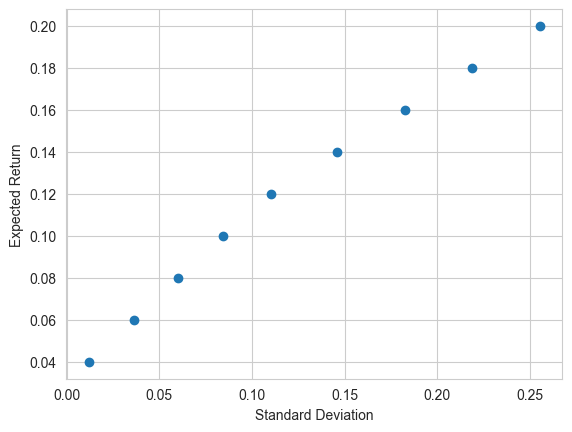

In [12]:
P = np.zeros((6, 6))
q = np.zeros((6, 1))
P[2:, 2:] = cov 
G = np.zeros((2, 6))
G[0, 0] = G[1, 1] = - 1
h = np.zeros(2).reshape(2, 1)
A = np.zeros((2, 6))
A[0, :] = np.concatenate(([1, -1], np.ones(4)))
A[1, :] = np.concatenate(([rs, -rb], means))
b = np.ones((2, 1))
ports = []

for targ in np.arange(0.04, 0.22, 0.02):
    b[1, 0] = targ
    sol = qp(
        P=matrix(P),
        q=matrix(q),
        A=matrix(A),
        b=matrix(b),
        G=matrix(G),
        h=matrix(h)
    )
    ports.append(np.array(sol["x"]).flatten())

mns = [A[1, :] @ w for w in ports]
sds = np.sqrt([w @ P @ w for w in ports])

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.scatter(sds, mns)
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.show()

## 5.5

Compute monthly and annual AAPL stock returns using Yahoo's Adjusted Close for the time period 1990 through 2022.  

1.  What is the standard deviation of the annual returns?

2.  What is sqrt(12)*std dev of the monthly returns?

3.  According to Module 5, which is the better estimate of the standard deviation of AAPL's annual stock return?

In [13]:
import yfinance as yf
price = yf.download("AAPL", start="1989-01-01", progress=False)["Adj Close"]
price_monthly = price.resample("M").last()
price_annual = price.resample("Y").last()
ret_monthly = price_monthly.pct_change()
ret_annual = price_annual.pct_change()
ret_monthly = ret_monthly[
    (ret_monthly.index >="1990-01-01") & (ret_monthly.index <= "2022-12-31")
]
ret_annual = ret_annual[
    (ret_annual.index >="1990-01-01") & (ret_annual.index <= "2022-12-31")
]
print(f"Annual std dev is {ret_annual.std():.2%}")
print(f"Annualized monthly std dev is {np.sqrt(12)*ret_monthly.std():.2%}")
print("The annualized monthly std dev is a better estimate.")

Annual std dev is 71.17%
Annualized monthly std dev is 42.44%
The annualized monthly std dev is a better estimate.


## 5.6

Use the webpage https://learn-investments.rice-business.org/portfolios/optimal-sb to find the means, standard deviations, and correlations of stocks, Treasury bonds, corporate bonds, and gold over the time period 1980-2022.  Using your estimate of risk aversion from Exercise 5.1, compute the optimal portfolio when the savings rate is 3%, the borrowing rate is 6%. and short sales are not allowed. 

In [14]:
# using assets = (stocks, gold, corporates, Treasuries)
# 
means = np.array([0.127, 0.041, 0.092, 0.07])
stdevs = np.array([0.166, 0.155, 0.086, 0.106])
corr = np.diag(np.ones(4))
corr[0, 1] = corr[1, 0] = -0.016
corr[0, 2] = corr[2, 0] = 0.451
corr[0, 3] = corr[3, 0] = 0.039
corr[1, 2] = corr[2, 1] = 0.137
corr[1, 3] = corr[3, 1] = 0.054
corr[2, 3] = corr[3, 2] = 0.652
cov = np.diag(stdevs) @ corr @ np.diag(stdevs)

P = np.zeros((6, 6))
P[2:, 2:] = raver * cov 
q = - np.concatenate(([rs, -rb], means)).reshape(6, 1)
A = np.concatenate(([1, -1], np.ones(4))).reshape(1, 6)
b = np.ones(1).reshape(1, 1)
G = - np.identity(6)
h = np.zeros((6, 1))

sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b),
    G=matrix(G),
    h=matrix(h)
)
x = np.array(sol["x"]).flatten()
import pandas as pd
pd.Series(x[2:], index=["S&P 500", "Gold", "Corporates", "Treasuries"]).round(2)

     pcost       dcost       gap    pres   dres
 0: -6.9843e-02 -7.0717e-01  8e+00  3e+00  3e+00
 1: -5.2179e-02 -1.3877e+00  2e+00  6e-01  6e-01
 2: -3.1509e-02 -1.3039e-01  1e-01  2e-15  1e-16
 3: -8.4655e-02 -9.7074e-02  1e-02  2e-16  3e-17
 4: -9.1959e-02 -9.3015e-02  1e-03  2e-16  6e-18
 5: -9.2534e-02 -9.2551e-02  2e-05  2e-16  8e-18
 6: -9.2539e-02 -9.2540e-02  2e-07  1e-16  2e-17
 7: -9.2539e-02 -9.2539e-02  2e-09  3e-16  6e-18
Optimal solution found.


S&P 500       0.56
Gold          0.00
Corporates    0.87
Treasuries    0.00
dtype: float64